In [2]:
import numpy as np
import matplotlib.pyplot as plt

import legume
import legume_backend

In [3]:
# Number of PhC periods in x and y directions
Nx, Ny = 16, 16

(hole_radius, slab_thickness, refractive_index,
 x_shift) = legume_backend.L3_params_520()

x_pos, y_pos = legume_backend.phc_cavity_holes_array(cavity_name='L3',
                                                     Nx=Nx,
                                                     Ny=Ny)
x_pos[0] = x_pos[0] + x_shift

# Initialize shift parameters from saved data file
# dx, dy = legume_backend.load_params_from_history(file_name, length=len(x_pos))

# Initialize shift parameters to zeros
dx, dy = np.zeros((len(x_pos), )), np.zeros((len(y_pos), ))

L3_phc = legume_backend.design_phc(Nx, Ny, x_pos, y_pos, hole_radius,
                                   slab_thickness, refractive_index, dx, dy)

#### Compute GME using `gme_cavity` function


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 2819 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'         │ 0.946    │ │--------------------│    3% │
│ Inverse matrix of Fourier-space permittivity                │ 5.066    │ │██------------------│   14% │
│ Matrix diagionalization using the 'eigsh' solver            │ 14.816   │ │████████------------│   41% │
│ Creating GME matrix                                         │ 15.258   │ │████████------------│   42% │
├─────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points      │ 36.086   │ │████████████████████│  100% │
└─────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Quality Factor =  2446 overlap =  0.033


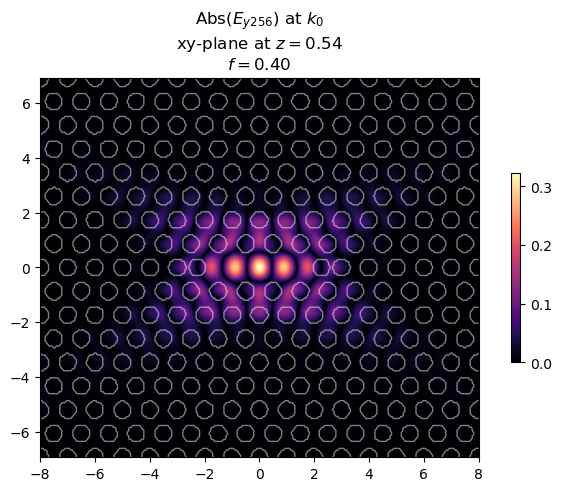

In [14]:
# Set GME options
num_modes = Nx * Ny + 1
options = {
    'gmode_inds': [0],
    'verbose': True,
    'numeig': num_modes,
    'gradients': 'approx',
    'compute_im': False,
    'eig_solver': 'eigsh'
}

kpoints = 1
gmax = 2
gaussian_width = 1.65

kpoints_array = legume_backend.get_kpoints(Nx, Ny, nkx=kpoints, nky=kpoints)

(gme, quality_factor, overlap,
 indmode) = legume_backend.gme_cavity(phc=L3_phc,
                                      Nx=Nx,
                                      Ny=Ny,
                                      gaussian_width=gaussian_width,
                                      gmax=gmax,
                                      kpoints=kpoints_array,
                                      gme_options=options)

print("Quality Factor = ", int(quality_factor), "overlap = ",
      np.round(overlap, 3))

ax = legume.viz.field(gme,
                      field='e',
                      kind=0,
                      mind=indmode,
                      z=slab_thickness / 2,
                      component='y',
                      val='abs',
                      N1=300,
                      N2=200)

After making sure the correct cavity mode is computed, save the eigenvector to use `gme_cavity_dot` function, which is faster.


In [15]:
legume_backend.save_eigvecs(
    gme,
    indmode=indmode,
    filename=f"./Legume_eigenvectors/L3_520nm_eigvecs_gmax={gmax}.npy")

#### Compute GME using `gme_cavity_dot` function


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 2819 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'         │ 0.999    │ │--------------------│    4% │
│ Inverse matrix of Fourier-space permittivity                │ 3.725    │ │███-----------------│   17% │
│ Matrix diagionalization using the 'eigsh' solver            │ 4.333    │ │███-----------------│   19% │
│ Creating GME matrix                                         │ 13.311   │ │███████████---------│   60% │
├─────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points      │ 22.369   │ │████████████████████│  100% │
└─────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Quality Factor =  2446 overlap =  0.033


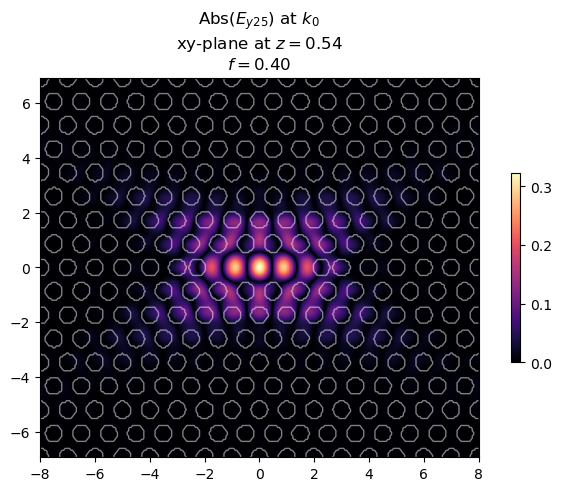

In [4]:
# Set GME options
num_modes = 30
options = {
    'gmode_inds': [0],
    'verbose': True,
    'numeig': num_modes,
    'eig_sigma': 0.4,  # compute num_modes around frequency = eig_sigma
    'gradients': 'approx',
    'compute_im': False,
    'eig_solver': 'eigsh'
}

kpoints = 1
gmax = 2
gaussian_width = 1.65

kpoints_array = legume_backend.get_kpoints(Nx, Ny, nkx=kpoints, nky=kpoints)

(gme, quality_factor, overlap,
 indmode) = legume_backend.gme_cavity_dot(L3_phc,
                                          gaussian_width=gaussian_width,
                                          gmax=gmax,
                                          kpoints=kpoints_array,
                                          gme_options=options)

print("Quality Factor = ", int(quality_factor), "overlap = ",
      np.round(overlap, 3))

ax = legume.viz.field(gme,
                      field='e',
                      kind=0,
                      mind=indmode,
                      z=slab_thickness / 2,
                      component='y',
                      val='abs',
                      N1=300,
                      N2=200)

#### Calculate and visualize the farfield of the PhC


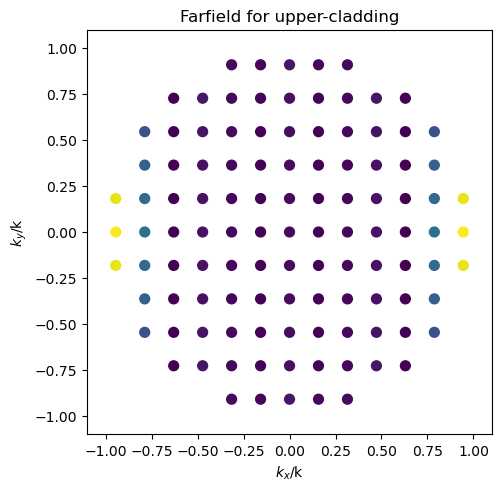

In [9]:
fig = legume_backend.visualize_far_field(gme, mind=indmode, cladding='u')